# Q1

考虑热对流方程：

$$
\frac{\partial T}{\partial t}=-k\cdot \nabla^2 T+q(t)
$$

奇怪的是，我查到的资料中显示：

封闭状态下，空气$k=0.023W/(m\cdot K)$

大气温度250K情况下，$k=0.02227W/(m\cdot K)$

然后就发现量纲对不上。。。右边两个单位都是$W/m^3$没问题，但是左边单位就不太对。。

等号两侧应该是$J/(m^3\cdot s)$这个量纲才对

所以我觉得其实上面等式应该修正：

$$
C\rho\cdot\frac{\partial T}{\partial t}=-k\cdot \nabla^2 T+q(t)
$$

$C$为比热，单位$J/(kg\cdot K)$,$\rho$为密度，单位$kg/m^3$这样一来单位才能统一

于是我找到这些参数：

$$
\begin{aligned}
k_\text{空气}&=0.023\quad W/(m\cdot K)\\
C_\text{空气}&=1005\quad J/(kg\cdot K)\\
\rho_\text{空气}&=1.293\times\frac{273.15}{T}\quad kg/m^3\\
\\
k_\text{水}&=0.6\quad W/(m\cdot K)\\
C_\text{水}&=4200\quad J/(kg\cdot K)\\
\rho_\text{水}&=1000\quad kg/m^3
\end{aligned}
$$

然后在不同介质中用这样的传热方程就ok了。

考虑到题目中,每个主机都是一个热源，假设其发热是匀质的话，可以得到热源中$q(t)$一项：

In [5]:
h=44.45e-3
b=482.6e-3
a=525e-3
Q=500
q=Q/(h*b*a)
print('热源中的 q(t)=',q,'W/m^3')

热源中的 q(t)= 44396.794844431075 W/m^3


然后我思考了一下，觉得还有些注意的点：

- 是否考虑流动？我觉得是必须考虑的，否则随着时间推移，整个集装箱里的服务器一直在产生热能，如果没有流动带走热量，那么考虑能量守恒缺不考虑流动的话，这个主机会把海水烤干。所以必须由流动带走热量，带走的热量和产生的热量互相平衡，以此来罗列方程。
- 金属的传热性是否会限制？这个由于官方文档没有给出详细结论，只是给出了材料的强度，这个我们就略过吧——**认为腔室内部的热源或者空气直接接触于海水，有一个介质上的突变**。
- 定解条件和边界条件？定解条件就是$T_{max}=80$,边界条件应该是$T_{\infty}=20$，但是这个边界作用在哪我还没有头绪，理论上可以想象这个柱体是海洋深处的发光棒，热向四周传播，因为洋流的流动带走热量，在离发光棒较远的地方维持环境温度20度，靠近物面处为80度，然后以海水为传播介质，看看在离圆柱那个位置处可以得到$T\rightarrow 20度$，以此为边界条件。

## 给出一些初始定义

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import math
import heat as sys

## 给定初始边界条件

In [7]:
T_init = np.zeros([sys.M,sys.N])
for j in range(sys.M):
    for i in range(sys.N):
        if sys.edge(j,i) in ['in','on']:
            T_init[j][i]=80
            pass
        else:
            T_init[j][i]=20
        pass
    pass

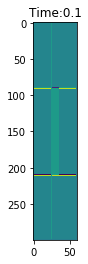

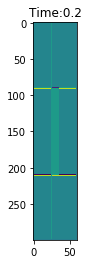

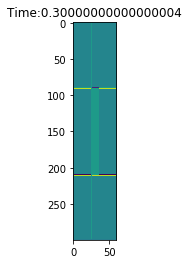

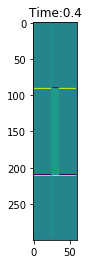

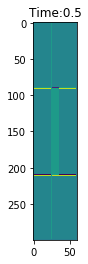

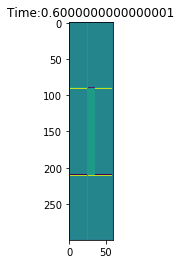

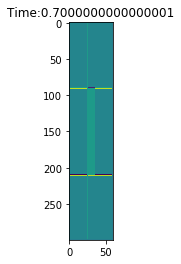

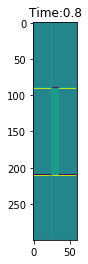

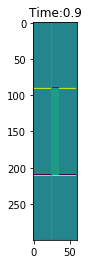

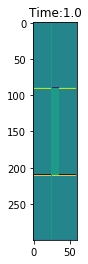

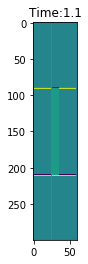

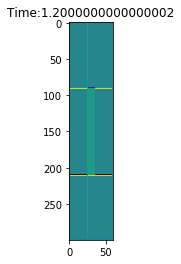

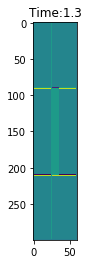

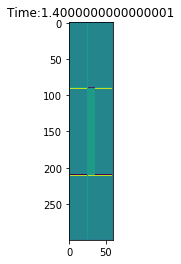

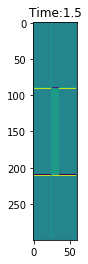

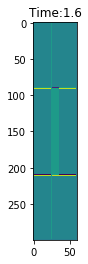

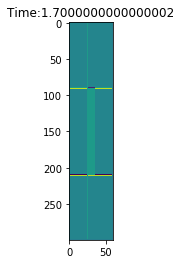

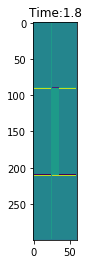

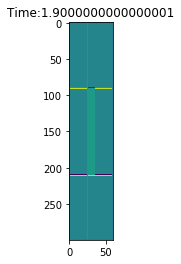

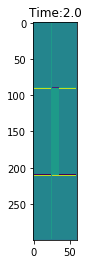

In [8]:
T_iter=T_init
for i in range(20):
    tmp_T=sys.next_T(T_iter)
    plt.imshow(tmp_T)
    plt.title('Time:'+str((i+1)*sys.dt))
    plt.show()